In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Problem 1 (a)

#### generate dataset

In [20]:
data = np.zeros(shape = (500, 2))
for i in range(500):
    w = np.random.rand()
    if w <= 0.2:
        data[i][0] = np.random.normal(loc = 0, scale = 1)
        data[i][1] = np.random.normal(loc = 0, scale = 1)
    elif w > 0.2 and w <= 0.7:
        data[i][0] = np.random.normal(loc = 3, scale = 1)
        data[i][1] = np.random.normal(loc = 0, scale = 1)
    elif w > 0.7:
        data[i][0] = np.random.normal(loc = 0, scale = 1)
        data[i][1] = np.random.normal(loc = 3, scale = 1)

In [21]:
def update_cluster(data, input_centroid):
    
    cluster_assignment = np.zeros(shape = (500,1), dtype = int)
    
    # for each data point calculate its cluster assignment
    for point in range(len(data)): 
        
        min_distance = float("inf")
        
        # calculate by going through all the clusters
        for c in range(len(input_centroid)):
            distance_curr = np.sum((data[point] - input_centroid[c]) ** 2)
            if distance_curr < min_distance:
                min_distance = distance_curr
                cluster_assignment[point][0] = c
    
    return cluster_assignment
            

In [22]:
def update_centroid(data, input_cluster):
    
    K = len(np.unique(input_cluster))
    merge = np.append(data, input_cluster, axis = 1)
    merge_df = pd.DataFrame(merge, columns = ['x', 'y', 'cluster'])
    centroid = np.zeros(shape = (K, 2))
    
    for i in range(K):
        select_df = merge_df.loc[merge_df['cluster'] == i]
        centroid[i][0] = select_df['x'].mean()
        centroid[i][1] = select_df['y'].mean()
    
    return centroid

In [23]:
import scipy.spatial.distance as ssd

# create df for plotting
plot_array = []
for i in range(20):
    plot_array.append(i+1)
plot_array = np.array(plot_array).reshape(-1,1)

# store cluster assignment when K = 3 or K = 5
cluster3 = np.zeros(shape = (500,1), dtype = int)
cluster5 = np.zeros(shape = (500,1), dtype = int)

for K in range(2,6):
    centroid = np.zeros(shape = (K, 2))
    cluster = np.zeros(shape = (500, 1), dtype = int)
    
    # randomly initialize centroid
    for init in range(K):
        w = np.random.rand()
        if w <= 0.2:
            centroid[init][0] = np.random.normal(loc = 0, scale = 1)
            centroid[init][1] = np.random.normal(loc = 0, scale = 1)
        elif w > 0.2 and w <= 0.7:
            centroid[init][0] = np.random.normal(loc = 3, scale = 1)
            centroid[init][1] = np.random.normal(loc = 0, scale = 1)
        elif w > 0.7:
            centroid[init][0] = np.random.normal(loc = 0, scale = 1)
            centroid[init][1] = np.random.normal(loc = 3, scale = 1)
    
    # start K-means
    each = []
    for iteration in range(20):
        cluster = update_cluster(data, centroid)
        centroid = update_centroid(data, cluster)
        
        # calculate objective function
        L = 0
        for j in range(500):
            cluster_assignment = cluster[j][0]
            L += np.sum((data[j] - centroid[cluster_assignment]) ** 2)
        
        # create array for plotting
        each.append(L)
    
    each = np.array(each).reshape(-1,1)
    plot_array = np.append(plot_array, each, axis = 1)
    
    # store cluster assignment if K=3 or K=5
    if K == 3:
        cluster3 = cluster
    if K == 5:
        cluster5 = cluster

plot_array_df = pd.DataFrame(plot_array, columns = ['Iteration', 'K=2', 'K=3', 'K=4', 'K=5'])
plot_array_df['Iteration'] = plot_array_df['Iteration'].astype('int64')
plot_array_df

,Iteration,K=2,K=3,K=4,K=5
0,1,1912.529850,1119.610276,1037.378108,841.400451
1,2,1480.457691,991.743691,913.587877,764.102242
2,3,1416.249697,950.040866,826.448828,731.118562
3,4,1411.445947,928.836718,800.409518,710.017013
4,5,1410.825490,917.471738,789.853623,676.641710
5,6,1410.336307,913.094726,786.115086,654.340923
6,7,1409.411217,909.879376,785.255988,642.933468
7,8,1409.269086,908.694812,784.804633,638.979876
8,9,1409.269086,907.511232,784.570306,636.975725
9,10,1409.269086,906.412926,784.304067,634.418153


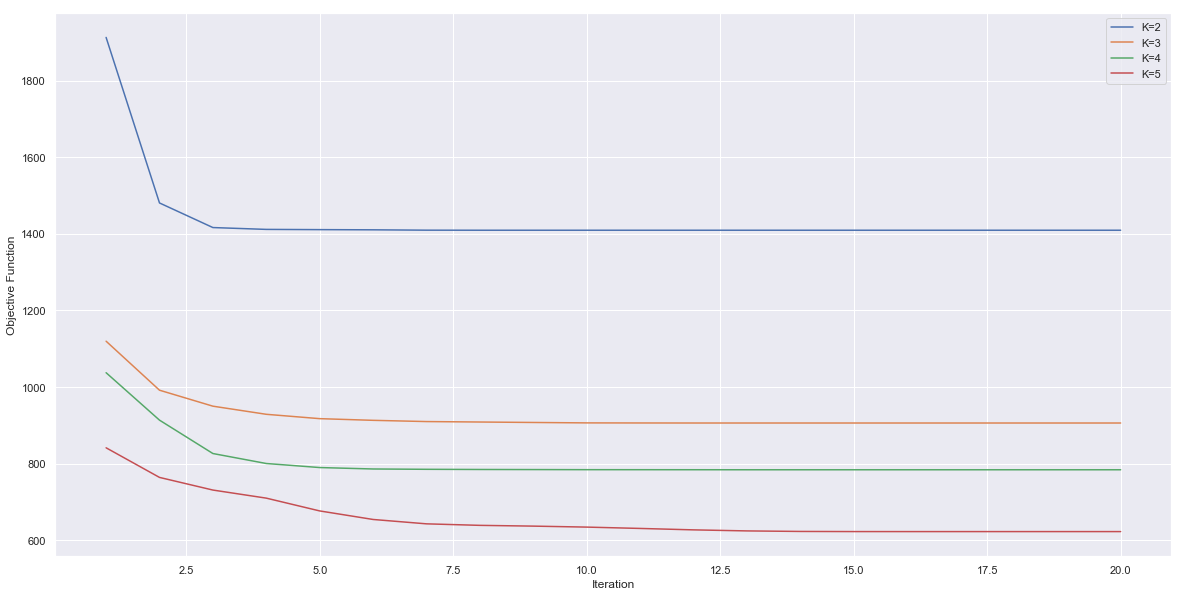

In [24]:
plt.figure(figsize=(20,10))
plt.plot('Iteration', 'K=2', data = plot_array_df)
plt.plot('Iteration', 'K=3', data = plot_array_df)
plt.plot('Iteration', 'K=4', data = plot_array_df)
plt.plot('Iteration', 'K=5', data = plot_array_df)
_ = plt.legend()
_ = plt.xlabel('Iteration')
_ = plt.ylabel('Objective Function')

## Problem 1(b)

In [25]:
plot_b = np.append(data, cluster3, axis = 1)
plot_b = np.append(plot_b, cluster5, axis = 1)
plot_b = pd.DataFrame(plot_b, columns = ['x', 'y', 'cluster3', 'cluster5'])
plot_b['cluster3'] = plot_b['cluster3'].astype('int64')
plot_b['cluster5'] = plot_b['cluster5'].astype('int64')
plot_b.head()

,x,y,cluster3,cluster5
0,-0.558571,-1.968758,1,0
1,-2.477371,2.884147,2,1
2,2.905859,-0.286877,0,2
3,3.432040,-0.667589,0,2
4,2.288357,-1.240694,0,4


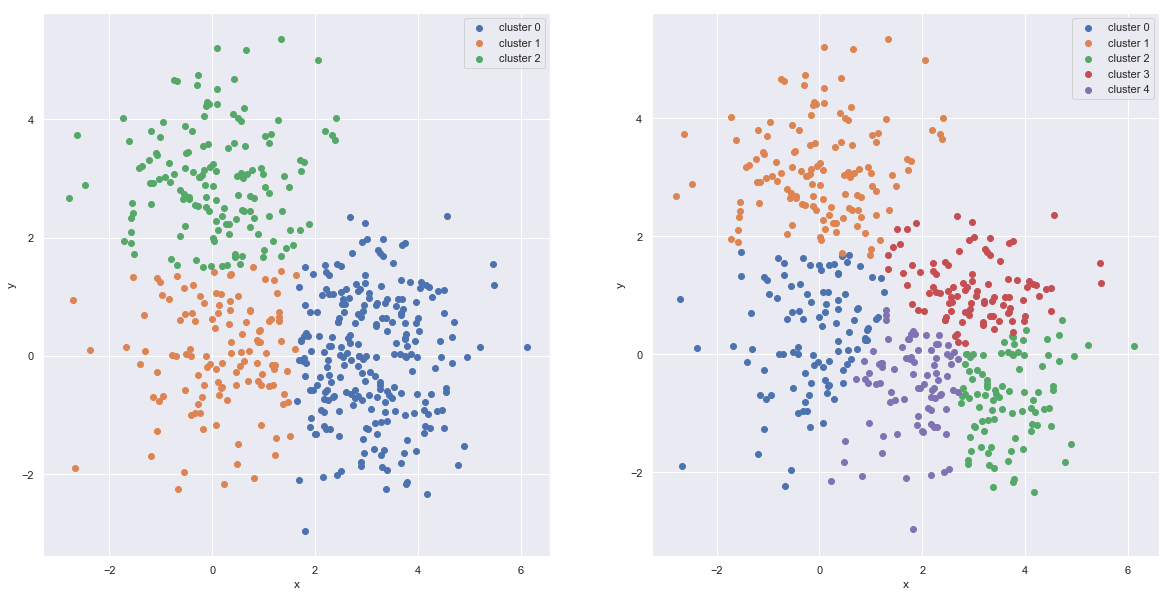

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (20,10))

# plot K=3
for i in range(3):
    subset = plot_b.loc[plot_b['cluster3'] == i]
    ax[0].scatter(subset.loc[:,'x'], subset.loc[:,'y'],label = 'cluster '+str(i))
_ = ax[0].legend()
_ = ax[0].set_xlabel('x')
_ = ax[0].set_ylabel('y')


# plot K=5
for i in range(5):
    subset = plot_b.loc[plot_b['cluster5'] == i]
    ax[1].scatter(subset.loc[:,'x'], subset.loc[:,'y'],label = 'cluster '+str(i))
_ = ax[1].legend()
_ = ax[1].set_xlabel('x')
_ = ax[1].set_ylabel('y')

## Problem 2 (a)

In [113]:
X_train = pd.read_csv("./hw3-data/Prob2_Xtrain.csv", header = None)
y_train = pd.read_csv("./hw3-data/Prob2_ytrain.csv", header = None)
X_test = pd.read_csv("./hw3-data/Prob2_Xtest.csv", header = None)
y_test = pd.read_csv("./hw3-data/Prob2_ytest.csv", header = None)

In [114]:
data0 = X_train.loc[y_train[0] == 0, :]
data1 = X_train.loc[y_train[0] == 1, :]
assert len(data0) + len(data1) == len(X_train)
data_list = []
data_list.extend([np.array(data0), np.array(data1)])

In [117]:
from scipy.stats import multivariate_normal

plot_2a = []
mix3_class0_params = []
mix3_class1_params = []
# for each class
for q in range(2):
    
    max_oj = 0 # max objective function
    
    # run 10 times
    for run_time in range(10):
        
        # variables definition
        data = data_list[q]
        K = 3  # K-Gaussian Mixture
        n = len(data)
        covariance_matrics = np.zeros(shape = (K, 10, 10))
        mean_matrics = np.zeros(shape = (K, 10))
        pai = np.zeros(shape = (K, ))
        weight = np.zeros(shape = (n, K))

        # initialization of covariance matrics
        cova = np.cov(data.T)
        for k in range(K):
            covariance_matrics[k] = cova

        # initialization of mean matrics
        data_mean = data.mean(axis = 0)
        mean_matrics = np.random.multivariate_normal(data_mean, cova, K)

        # initialization of pai
        for k in range(K):
            pai[k] = 1 / K

        # begin EM
        for iteration in range(30):
            
            # E-step
            denominator = np.zeros(shape = (n, 1))
            for k in range(K):
                weight[:, [k]] = pai[k] * multivariate_normal.pdf(data, mean=mean_matrics[k], \
                                                                    cov=covariance_matrics[k]).reshape(n,1)
            denominator = np.sum(weight, axis = 1).reshape(n,1)
            weight = weight / denominator
                    
            
            # M-step
            number = np.zeros(shape = (K, ))
            for k in range(K):

                # calculate number belong to cluster k
                for i in range(n):
                    number[k] += weight[i][k]
                
                # update parameters
                # update pai
                pai[k] = number[k] / n
                
                # update mean
                mean_matrics[k] = np.dot(data.T, weight[:, k]).T / number[k]
                
                # update covariance
                covariance = np.zeros(shape = (10,10))
                for i in range(n):
                    covariance += np.dot((data[i] - mean_matrics[k]).reshape(10,1), \
                                         (data[i] - mean_matrics[k]).reshape(1,10)) * weight[i][k]
                covariance_matrics[k] = covariance / number[k]
                
            # calculate log marginal objective function
            result = np.zeros(shape = (n,K))
            for k in range(K):
                result[:, [k]] = pai[k] * multivariate_normal.pdf(data, mean=mean_matrics[k], \
                                                          cov=covariance_matrics[k]).reshape(n,1)
            L = np.sum(np.log(np.sum(result, axis = 1)), axis = 0)
            
            # create plot matrix
            row = []
            row.extend([q, run_time + 1, iteration + 1, L])
            plot_2a.append(row)
        
        # record the max objective function
        if L > max_oj and q == 0:
            max_oj = L
            mix3_class0_params = []
            mix3_class0_params.extend([pai, mean_matrics, covariance_matrics, max_oj])
        elif L > max_oj and q == 1:
            max_oj = L
            mix3_class1_params = []
            mix3_class1_params.extend([pai, mean_matrics, covariance_matrics, max_oj])
            
            
plot_2a_df = pd.DataFrame(plot_2a, columns = ['Class', 'Run', 'Iteration', 'Objective Function'])
plot_2a_df.head()

,Class,Run,Iteration,Objective Function
0,0,1,1,35210.950615
1,0,1,2,40111.848125
2,0,1,3,41614.212277
3,0,1,4,42402.776159
4,0,1,5,43153.083836


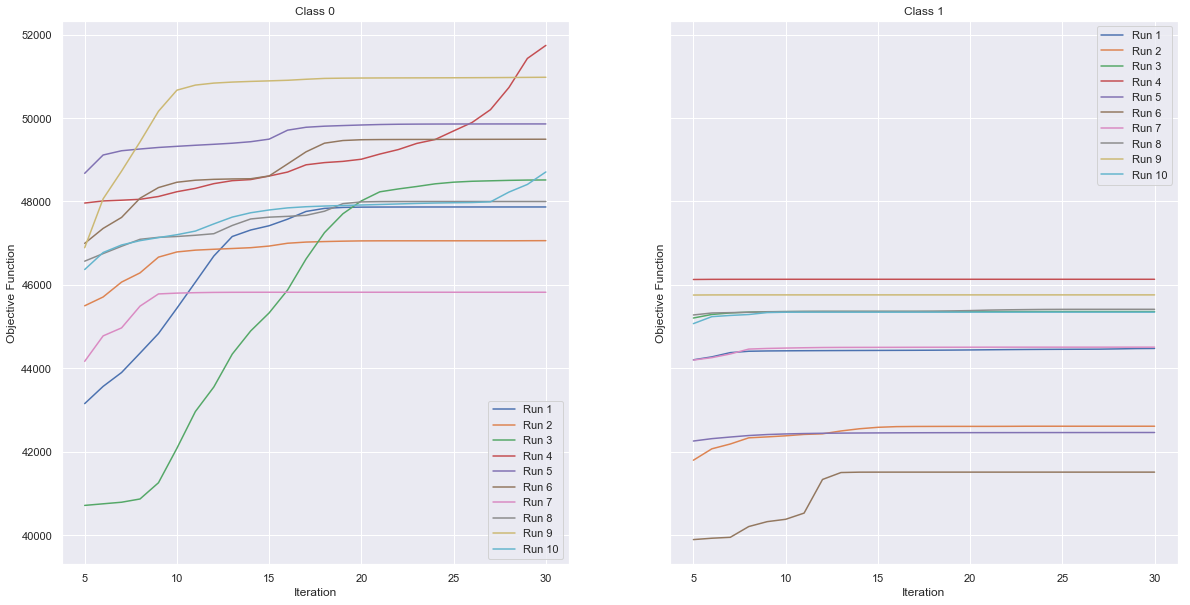

In [118]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (20,10))

# plot class = 0
for i in range(10):
    subset = plot_2a_df.loc[(plot_2a_df['Class'] == 0) & (plot_2a_df['Iteration'] >= 5) & (plot_2a_df['Run'] == i+1)]
    ax[0].plot(subset.loc[:,'Iteration'], subset.loc[:,'Objective Function'],label = 'Run '+str(i+1))
_ = ax[0].legend()
_ = ax[0].set_xlabel('Iteration')
_ = ax[0].set_ylabel('Objective Function')
_ = ax[0].set_title('Class 0')


# plot class = 1
for i in range(10):
    subset = plot_2a_df.loc[(plot_2a_df['Class'] == 1) & (plot_2a_df['Iteration'] >= 5) & (plot_2a_df['Run'] == i+1)]
    ax[1].plot(subset.loc[:,'Iteration'], subset.loc[:,'Objective Function'],label = 'Run '+str(i+1))
_ = ax[1].legend()
_ = ax[1].set_xlabel('Iteration')
_ = ax[1].set_ylabel('Objective Function')
_ = ax[1].set_title('Class 1')

## Problem 2 (b)

In [119]:
pai_0 = len(X_test.loc[y_test[0] == 0, :]) / len(X_test)
pai_1 = len(X_test.loc[y_test[0] == 1, :]) / len(X_test)
assert pai_0 + pai_1 == 1

In [120]:
# K = 3
prob0 = pai_0 * \
(mix3_class0_params[0][0] * \
 np.array(multivariate_normal.pdf(X_test, mean=mix3_class0_params[1][0], cov=mix3_class0_params[2][0])) + \
 mix3_class0_params[0][1] * \
 np.array(multivariate_normal.pdf(X_test, mean=mix3_class0_params[1][1], cov=mix3_class0_params[2][1])) + \
 mix3_class0_params[0][2] * \
 np.array(multivariate_normal.pdf(X_test, mean=mix3_class0_params[1][2], cov=mix3_class0_params[2][2])))

prob1 = pai_1 * \
(mix3_class1_params[0][0] * \
 np.array(multivariate_normal.pdf(X_test, mean=mix3_class1_params[1][0], cov=mix3_class1_params[2][0])) + \
 mix3_class1_params[0][1] * \
 np.array(multivariate_normal.pdf(X_test, mean=mix3_class1_params[1][1], cov=mix3_class1_params[2][1])) + \
 mix3_class1_params[0][2] * \
 np.array(multivariate_normal.pdf(X_test, mean=mix3_class1_params[1][2], cov=mix3_class1_params[2][2])))

y_predict = (prob0 < prob1).astype(int).reshape(-1,1)
y_predict.shape

(460, 1)

In [121]:
y_test.shape

(460, 1)

In [122]:
result_df = pd.DataFrame(np.append(y_predict, y_test, axis = 1), columns = ['y_predict', 'y_test'])
true_positive_3 = len(result_df.loc[(result_df['y_predict'] == 1) & (result_df['y_test'] == 1)])
false_positive_3 = len(result_df.loc[(result_df['y_predict'] == 1) & (result_df['y_test'] == 0)])
true_negative_3 = len(result_df.loc[(result_df['y_predict'] == 0) & (result_df['y_test'] == 0)])
false_negative_3 = len(result_df.loc[(result_df['y_predict'] == 0) & (result_df['y_test'] == 1)])
confusion_matrix_3 = np.zeros(shape = (2,3), dtype = int)
confusion_matrix_3[0][0] = 1
confusion_matrix_3[1][1] = 0
confusion_matrix_3[0][1] = true_positive_3
confusion_matrix_3[1][1] = false_positive_3
confusion_matrix_3[0][2] = false_negative_3
confusion_matrix_3[1][2] = true_negative_3
confusion_matrix_3_df = pd.DataFrame(confusion_matrix_3, columns = ['actual', 'predict_y = 1', 'predict_y = 0'])
confusion_matrix_3_df.set_index('actual', drop = True, inplace = True)
print(confusion_matrix_3_df)
precision_3 = (true_positive_3 + true_negative_3) / len(X_test)
print('precision=', precision_3)

        predict_y = 1  predict_y = 0
actual                              
1                 170             12
0                  73            205
precision= 0.8152173913043478


In [123]:
class0_params = []
class1_params = []

for K in [1,2,4]:  # K mixture gaussian
    
    # for each class
    for q in range(2):

        max_oj = 0 # max objective function
        max_params = []

        # run 10 times
        for run_time in range(10):

            # variables definition
            data = data_list[q]
            n = len(data)
            covariance_matrics = np.zeros(shape = (K, 10, 10))
            mean_matrics = np.zeros(shape = (K, 10))
            pai = np.zeros(shape = (K, ))
            weight = np.zeros(shape = (n, K))

            # initialization of covariance matrics
            cova = np.cov(data.T)
            for k in range(K):
                covariance_matrics[k] = cova

            # initialization of mean matrics
            data_mean = data.mean(axis = 0)
            mean_matrics = np.random.multivariate_normal(data_mean, cova, K)

            # initialization of pai
            for k in range(K):
                pai[k] = 1 / K

            # begin EM
            for iteration in range(30):

                # E-step
                denominator = np.zeros(shape = (n, 1))
                for k in range(K):
                    weight[:, [k]] = pai[k] * multivariate_normal.pdf(data, mean=mean_matrics[k], \
                                            cov=covariance_matrics[k], allow_singular = True).reshape(n,1)
                denominator = np.sum(weight, axis = 1).reshape(n,1)
                weight = weight / denominator


                # M-step
                number = np.zeros(shape = (K, ))
                for k in range(K):

                    # calculate number belong to cluster k
                    for i in range(n):
                        number[k] += weight[i][k]

                    # update parameters
                    # update pai
                    pai[k] = number[k] / n

                    # update mean
                    mean_matrics[k] = np.dot(data.T, weight[:, k]).T / number[k]

                    # update covariance
                    covariance = np.zeros(shape = (10,10))
                    for i in range(n):
                        covariance += np.dot((data[i] - mean_matrics[k]).reshape(10,1), \
                                             (data[i] - mean_matrics[k]).reshape(1,10)) * weight[i][k]
                    covariance_matrics[k] = covariance / number[k]

                # calculate log marginal objective function
                result = np.zeros(shape = (n,K))
                for k in range(K):
                    result[:, [k]] = pai[k] * multivariate_normal.pdf(data, mean=mean_matrics[k], \
                                                cov=covariance_matrics[k], allow_singular = True).reshape(n,1)
                L = np.sum(np.log(np.sum(result, axis = 1)), axis = 0)

                # create plot matrix
                row = []
                row.extend([q, run_time + 1, iteration + 1, L])
                plot_2a.append(row)

            # record the max objective function
            if L > max_oj and q == 0:
                max_oj = L
                max_params = []
                max_params.extend([pai, mean_matrics, covariance_matrics, max_oj])
            elif L > max_oj and q == 1:
                max_oj = L
                max_params = []
                max_params.extend([pai, mean_matrics, covariance_matrics, max_oj])
                
        if q == 0:
            class0_params.append(max_params)
        else:
            class1_params.append(max_params)


In [124]:
for k in [1,2,4]:
    
    if k == 4: 
        j = k - 2
    else: 
        j = k - 1
    
    if j == 0: # 1 mixture gaussian
        prob0 = pai_0 * \
        (class0_params[j][0][0] * \
         np.array(multivariate_normal.pdf(X_test, mean=class0_params[j][1][0], cov=class0_params[j][2][0])))

        prob1 = pai_1 * \
        (class1_params[j][0][0] * \
         np.array(multivariate_normal.pdf(X_test, mean=class1_params[j][1][0], cov=class1_params[j][2][0])))
    
    elif j == 1:  # 2 mixture gaussian
        prob0 = pai_0 * \
        (class0_params[j][0][0] * \
         np.array(multivariate_normal.pdf(X_test, mean=class0_params[j][1][0], cov=class0_params[j][2][0])) + \
         class0_params[j][0][1] * \
         np.array(multivariate_normal.pdf(X_test, mean=class0_params[j][1][1], cov=class0_params[j][2][1])))

        prob1 = pai_1 * \
        (class1_params[j][0][0] * \
         np.array(multivariate_normal.pdf(X_test, mean=class1_params[j][1][0], cov=class1_params[j][2][0])) + \
         class1_params[j][0][1] * \
         np.array(multivariate_normal.pdf(X_test, mean=class1_params[j][1][1], cov=class1_params[j][2][1])))
    
    else: # 4 mixture gaussian
        prob0 = pai_0 * \
        (class0_params[j][0][0] * \
         np.array(multivariate_normal.pdf(X_test, mean=class0_params[j][1][0], cov=class0_params[j][2][0])) + \
         class0_params[j][0][1] * \
         np.array(multivariate_normal.pdf(X_test, mean=class0_params[j][1][1], cov=class0_params[j][2][1])) + \
         class0_params[j][0][2] * \
         np.array(multivariate_normal.pdf(X_test, mean=class0_params[j][1][2], cov=class0_params[j][2][2])) + \
         class0_params[j][0][3] * \
         np.array(multivariate_normal.pdf(X_test, mean=class0_params[j][1][3], cov=class0_params[j][2][3])))

        prob1 = pai_1 * \
        (class1_params[j][0][0] * \
         np.array(multivariate_normal.pdf(X_test, mean=class1_params[j][1][0], cov=class1_params[j][2][0])) + \
         class1_params[j][0][1] * \
         np.array(multivariate_normal.pdf(X_test, mean=class1_params[j][1][1], cov=class1_params[j][2][1])) + \
         class1_params[j][0][2] * \
         np.array(multivariate_normal.pdf(X_test, mean=class1_params[j][1][2], cov=class1_params[j][2][2])) + \
         class1_params[j][0][3] * \
         np.array(multivariate_normal.pdf(X_test, mean=class1_params[j][1][3], cov=class1_params[j][2][3])))
    
    y_predict = (prob0 < prob1).astype(int).reshape(-1,1)
    
    result_df = pd.DataFrame(np.append(y_predict, y_test, axis = 1), columns = ['y_predict', 'y_test'])
    true_positive = len(result_df.loc[(result_df['y_predict'] == 1) & (result_df['y_test'] == 1)])
    false_positive = len(result_df.loc[(result_df['y_predict'] == 1) & (result_df['y_test'] == 0)])
    true_negative = len(result_df.loc[(result_df['y_predict'] == 0) & (result_df['y_test'] == 0)])
    false_negative = len(result_df.loc[(result_df['y_predict'] == 0) & (result_df['y_test'] == 1)])
    confusion_matrix = np.zeros(shape = (2,3), dtype = int)
    confusion_matrix[0][0] = 1
    confusion_matrix[1][1] = 0
    confusion_matrix[0][1] = true_positive
    confusion_matrix[1][1] = false_positive
    confusion_matrix[0][2] = false_negative
    confusion_matrix[1][2] = true_negative
    confusion_matrix_df = pd.DataFrame(confusion_matrix, columns = ['actual', 'predict_y = 1', 'predict_y = 0'])
    confusion_matrix_df.set_index('actual', drop = True, inplace = True)
    print(confusion_matrix_df)
    precision = (true_positive + true_negative) / len(X_test)
    print('precision=', precision)

        predict_y = 1  predict_y = 0
actual                              
1                 174              8
0                  96            182
precision= 0.7739130434782608
        predict_y = 1  predict_y = 0
actual                              
1                 167             15
0                  78            200
precision= 0.7978260869565217
        predict_y = 1  predict_y = 0
actual                              
1                 173              9
0                  53            225
precision= 0.8652173913043478


## Problem 3 (a)

In [50]:
train = pd.read_csv("./hw3-data/Prob3_ratings.csv", header = None)
test = pd.read_csv("./hw3-data/Prob3_ratings_test.csv", header = None)
train.columns = ['user_id', 'movie_id', 'ratings']
test.columns = ['user_id', 'movie_id', 'ratings']
N1 = train['user_id'].max()
N2 = train['movie_id'].max()
N = len(train)
d = 10
test.head()

,user_id,movie_id,ratings
0,617,590,-2.53040
1,836,12,1.46960
2,933,239,-0.53039
3,85,622,-0.53039
4,886,204,-0.53039


In [63]:
import scipy.sparse as ss
M = ss.coo_matrix((np.array(train['ratings']), (np.array(train['user_id'])-1, np.array(train['movie_id'])-1)), \
                  shape=(N1, N2)).toarray()

user_movie = []
movie_user = []

# for each user, add the movies he/she rates
for user_id in range(N1):
    
    temp = []
    for movie_id in range(N2):
        if M[user_id][movie_id] != 0:
            temp.append(movie_id)
    user_movie.append(temp)

# for each movie, add the users who rated it
for movie_id in range(N2):
    
    temp = []
    for user_id in range(N1):
        if M[user_id][movie_id] != 0:
            temp.append(user_id)
    movie_user.append(temp)


In [64]:
from numpy.linalg import inv

L = np.zeros(shape = (10, 100))
u_record = []
v_record = []
I = np.identity(d)

for run in range(10):
    
    u = np.zeros(shape = (N1, d))
    v = np.zeros(shape = (N2, d))
    v = np.random.multivariate_normal([0] * d, I, N2)
    
    for iteration in range(100):
        
        for i in range(N1):
            
            v_temp = v[user_movie[i]]
            vv = np.dot(v_temp.T, v_temp)
            first = inv(0.25 * I + vv)
            Mij = M[i, user_movie[i]].reshape(-1, 1)
            second = np.dot(v_temp.T, Mij)
            u[i] = np.dot(first, second).reshape(-1)
        
        for j in range(N2):
            
            u_temp = u[movie_user[j]]
            uu = np.dot(u_temp.T, u_temp)
            first = inv(0.25 * I + uu)
            Mij = M[movie_user[j], j].reshape(-1, 1)
            second = np.dot(u_temp.T, Mij)
            v[j] = np.dot(first, second).reshape(-1)
        
        # calculate objective function
        L[run][iteration] = -2 * np.sum(np.array((M - np.dot(u, v.T))[M!=0]) ** 2) \
                            - 0.5 * np.sum(u ** 2) - 0.5 * np.sum(v ** 2)
        print(run+1, iteration+1, "finished")
    
    u_record.append(u)
    v_record.append(v)

1 1 finished
1 2 finished
1 3 finished
1 4 finished
1 5 finished
1 6 finished
1 7 finished
1 8 finished
1 9 finished
1 10 finished
1 11 finished
1 12 finished
1 13 finished
1 14 finished
1 15 finished
1 16 finished
1 17 finished
1 18 finished
1 19 finished
1 20 finished
1 21 finished
1 22 finished
1 23 finished
1 24 finished
1 25 finished
1 26 finished
1 27 finished
1 28 finished
1 29 finished
1 30 finished
1 31 finished
1 32 finished
1 33 finished
1 34 finished
1 35 finished
1 36 finished
1 37 finished
1 38 finished
1 39 finished
1 40 finished
1 41 finished
1 42 finished
1 43 finished
1 44 finished
1 45 finished
1 46 finished
1 47 finished
1 48 finished
1 49 finished
1 50 finished
1 51 finished
1 52 finished
1 53 finished
1 54 finished
1 55 finished
1 56 finished
1 57 finished
1 58 finished
1 59 finished
1 60 finished
1 61 finished
1 62 finished
1 63 finished
1 64 finished
1 65 finished
1 66 finished
1 67 finished
1 68 finished
1 69 finished
1 70 finished
1 71 finished
1 72 finished
1

6 91 finished
6 92 finished
6 93 finished
6 94 finished
6 95 finished
6 96 finished
6 97 finished
6 98 finished
6 99 finished
6 100 finished
7 1 finished
7 2 finished
7 3 finished
7 4 finished
7 5 finished
7 6 finished
7 7 finished
7 8 finished
7 9 finished
7 10 finished
7 11 finished
7 12 finished
7 13 finished
7 14 finished
7 15 finished
7 16 finished
7 17 finished
7 18 finished
7 19 finished
7 20 finished
7 21 finished
7 22 finished
7 23 finished
7 24 finished
7 25 finished
7 26 finished
7 27 finished
7 28 finished
7 29 finished
7 30 finished
7 31 finished
7 32 finished
7 33 finished
7 34 finished
7 35 finished
7 36 finished
7 37 finished
7 38 finished
7 39 finished
7 40 finished
7 41 finished
7 42 finished
7 43 finished
7 44 finished
7 45 finished
7 46 finished
7 47 finished
7 48 finished
7 49 finished
7 50 finished
7 51 finished
7 52 finished
7 53 finished
7 54 finished
7 55 finished
7 56 finished
7 57 finished
7 58 finished
7 59 finished
7 60 finished
7 61 finished
7 62 finished


In [67]:
plot_3 = []
for run in range(10):
    for iteration in range(100):
        if iteration != 0:
            row = []
            row.extend([run+1, iteration+1, L[run][iteration]])
            plot_3.append(row)
plot_3_df = pd.DataFrame(plot_3, columns = ['run', 'iteration', 'log objective function'])
plot_3_df.head()

,run,iteration,log objective function
0,1,2,-135580.717514
1,1,3,-116931.402585
2,1,4,-109944.495529
3,1,5,-106314.564741
4,1,6,-103985.295700


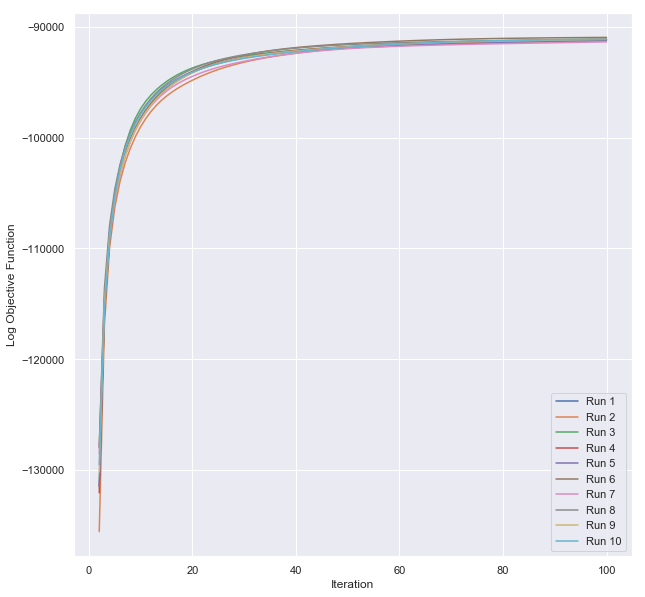

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

for i in range(10):
    subset = plot_3_df.loc[plot_3_df['run'] == i]
    ax.plot(subset.loc[:,'iteration'], subset.loc[:,'log objective function'],label = 'Run '+str(i+1))
_ = ax.legend()
_ = ax.set_xlabel('Iteration')
_ = ax.set_ylabel('Log Objective Function')

In [77]:
oj = plot_3_df.loc[plot_3_df['iteration'] == 100, ['run', 'log objective function']]
oj

,run,log objective function
98,1,-91267.607380
197,2,-91098.872696
296,3,-91116.849300
395,4,-91229.125730
494,5,-90952.015727
593,6,-91355.383168
692,7,-91161.555879
791,8,-91112.660541
890,9,-91125.999104
989,10,-91109.439371


In [90]:
RMSE_list = []
test_array = np.array(test)
for run in range(10):
    diff = []
    for row in range(len(test)):
        y_predict = np.dot(u_record[run][int(test_array[row][0] - 1)], v_record[run][int(test_array[row][1] - 1)])
        diff.append(test_array[row][2] - y_predict)
    diff = np.array(diff)
    RMSE_list.append(np.sqrt(np.sum(diff ** 2)))

RMSE_list = np.array(RMSE_list).reshape(-1,1)
oj_list = np.array(oj).reshape(10,2)
table = pd.DataFrame(np.append(oj_list, RMSE_list, axis = 1), columns = ['run', 'log objective function', 'RMSE'])
table['run'] = table['run'].astype(int)
table.sort_values('log objective function', ascending = False, inplace = True)
table.reset_index(drop = True, inplace = True)
table

,run,log objective function,RMSE
0,5,-90952.015727,79.161401
1,2,-91098.872696,79.157046
2,10,-91109.439371,78.878511
3,8,-91112.660541,77.953499
4,3,-91116.849300,78.864430
5,9,-91125.999104,79.387910
6,7,-91161.555879,78.025626
7,4,-91229.125730,79.392526
8,1,-91267.607380,78.170480
9,6,-91355.383168,77.572405


## Problem 3 (b)

In [110]:
file = open('./hw3-data/Prob3_movies.txt', 'r') 
mapping = np.array(file.read().split('\n'))

In [112]:
# Star War: 50, My Fair Lady: 485, Goodfellas: 182
best_run = 5
final = []
for j in [49, 484, 181]:
    distance_all = np.sum((v_record[best_run] - v_record[best_run][j]) ** 2, axis = 1)
    index = np.argsort(distance_all)[1:11]
    distance = np.sort(distance_all)[1:11]
    movies = mapping[index]
    df = np.append(np.array([mapping[j]] * 10).reshape(-1,1), movies.reshape(-1,1), axis = 1)
    df = np.append(df, distance.reshape(-1,1), axis = 1)
    final.append(df)

final_df = np.append(final[0], final[1], axis = 0)
final_df = np.append(final_df, final[2], axis = 0)
final_df = pd.DataFrame(final_df, columns = ['Query Movie', 'Nearerst Movies', 'Distance'])
final_df

,Query Movie,Nearerst Movies,Distance
0,Star Wars (1977),"Empire Strikes Back, The (1980)",0.10410755386598342
1,Star Wars (1977),Raiders of the Lost Ark (1981),0.2861667143982881
2,Star Wars (1977),Return of the Jedi (1983),0.40131042654095284
3,Star Wars (1977),"Man Who Would Be King, The (1975)",0.699902363552408
4,Star Wars (1977),Aliens (1986),0.7156945699415868
5,Star Wars (1977),"Usual Suspects, The (1995)",0.7426128485828061
6,Star Wars (1977),Indiana Jones and the Last Crusade (1989),0.7520131321019097
7,Star Wars (1977),"Blues Brothers, The (1980)",0.8041921753127722
8,Star Wars (1977),Back to the Future (1985),0.8457384572278502
9,Star Wars (1977),"Sting, The (1973)",0.8859304838338359
